# Multi-Linear Regression - Startup Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ABHAY\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
startup = pd.read_csv("50_Startups.csv")

In [4]:
startup.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<p> We see that correlation matrix does not includes State variable as its string type.
So we have to convert this to dummy variable.<p>

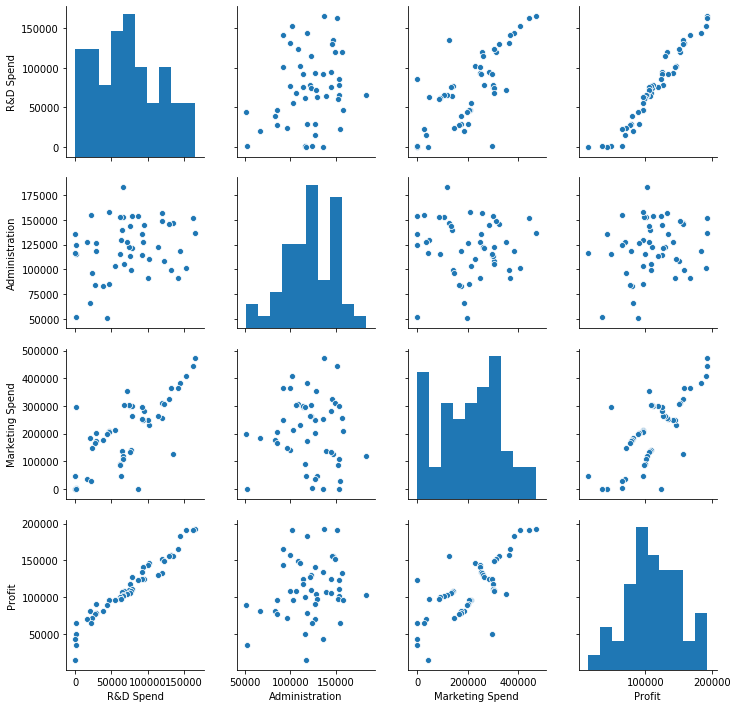

In [8]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(startup)

#### First we will create a linear model excluding state variable

In [15]:
import statsmodels.api as sm
X = startup.drop(['Profit','State'],axis=1)
Y = startup.Profit
Xc = sm.add_constant(X)
MLM_stateexcl = sm.OLS(Y,Xc).fit()
MLM_stateexcl.summary()

C:\Users\ABHAY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           4.53e-30
Time:                        18:56:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now lets create dummy variable for state.

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()

In [14]:
Xarr = startup.iloc[:, :-1].values

In [16]:
X = startup.drop(['Profit'],axis=1)

In [19]:
X['State'] = labelencoder.fit_transform(X['State'])

In [20]:
onehotencoder = OneHotEncoder(categorical_features=[3])

In [32]:
Xdum = pd.DataFrame(onehotencoder.fit_transform(X).toarray())

C:\Users\ABHAY\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [41]:
Xdc = sm.add_constant(Xdum)

C:\Users\ABHAY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<p> Lets create a linear model now <p>

In [37]:
MLM_stateincl = sm.OLS(Y,Xdc).fit()
MLM_stateincl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.34e-27
Time:                        19:11:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
0           1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
1           1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
2           1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
3              0.8060      0.046     17.369      0.000       0.712       0.900
4             -0.0270      0.052     -0.517      0.608      -0.132       0.078
5              0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.35e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
#### lets create another model excluding Administration 
Xdc = Xdc.drop(4,axis=1)

In [45]:
MLM_Admexcl = sm.OLS(Y,Xdc).fit()
MLM_Admexcl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           9.72e-29
Time:                        19:29:44   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
0           1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
1           1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
2           1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
3              0.7967      0.042     18.771      0.000       0.711       0.882
5              0.0298      0.016      1.842      0.072      -0.003       0.062
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     6.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.33e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Figure size 432x432 with 0 Axes>

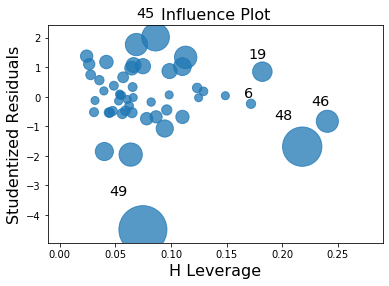

In [52]:
# Influence plot for MLM_stateincl model
fig = plt.figure(figsize=(6,6))
fig = sm.graphics.influence_plot(MLM_stateexcl,fig=fig)

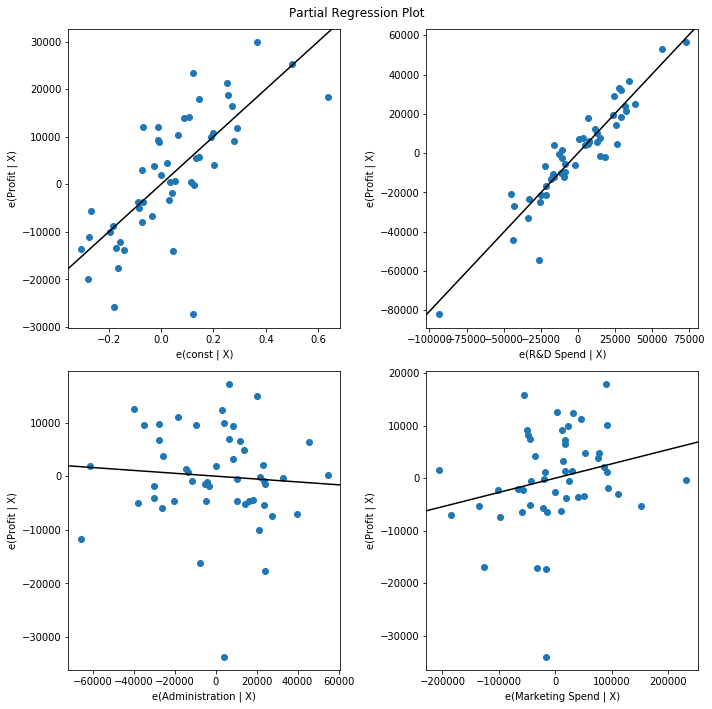

In [53]:
# Added varible plot 
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_partregress_grid(MLM_stateexcl,fig=fig)

In [54]:
models = ['MLM_stateexcl','MLM_stateincl','MLM_Admexcl']
Rsq =[MLM_stateexcl.rsquared,MLM_stateincl.rsquared,MLM_Admexcl.rsquared]

In [58]:
Model_compare = pd.DataFrame(Rsq,index=models,columns=['R-Squared'])

In [59]:
Model_compare

,R-Squared
MLM_stateexcl,0.950746
MLM_stateincl,0.950752
MLM_Admexcl,0.950453


### From the table above we can see that MLM_stateincl model has high r-squared value.